## Reading EM Data from HDF5 Dataset and Simple Visualisations

### Importing Libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

### Opening HDF5 File

In [2]:
# openning the file
hf = h5py.File('/home/asanka/Downloads/ASEADOS-Dataset/em-dataset.h5', 'r')

### Displaying Dataset Attributes

In [3]:
# printing the attributes of the file
for item in hf.attrs.keys():
    print(item + ":", hf.attrs[item])

dataset_creater: Asanka P. Sayakkara <asa@ucsc.cmb.ac.lk>
dataset_date: 2021-03-01
dataset_version: 1


### Displaying Full Hierarchy of the Dataset Files

In [4]:
def printname(name):
    print(name)
    
# viewing full data structure
hf.visit(printname)

internet-of-things
internet-of-things/amazon-echo-dot
internet-of-things/amazon-echo-dot/asking-a-definition
internet-of-things/amazon-echo-dot/asking-for-time
internet-of-things/amazon-echo-dot/asking-to-play-radio
internet-of-things/amazon-echo-dot/controlling-lightbulb
internet-of-things/amazon-echo-dot/device-idle
internet-of-things/amazon-echo-dot/device-muted
internet-of-things/amazon-echo-dot/device-resetting
internet-of-things/amazon-echo-dot/just-wakeup-word
internet-of-things/amazon-echo-dot/powering-on
internet-of-things/amazon-echo-show5
internet-of-things/amazon-echo-show5/asking-a-definition
internet-of-things/amazon-echo-show5/asking-for-time
internet-of-things/amazon-echo-show5/asking-to-play-radio
internet-of-things/amazon-echo-show5/controlling-lightbulb
internet-of-things/amazon-echo-show5/device-idle
internet-of-things/amazon-echo-show5/device-resetting
internet-of-things/amazon-echo-show5/just-wakeup-word
internet-of-things/amazon-echo-show5/powering-off
internet-o

### Loading a Particular Data File inside the HDF5 File into a Numpy Array

In [5]:
# reading a dataset
data = hf.get('/smartphones/iphone4s/calendar-app')
print(np.array(data).shape)

(59900416,)


### Plotting Power Spectral Density (PSD)

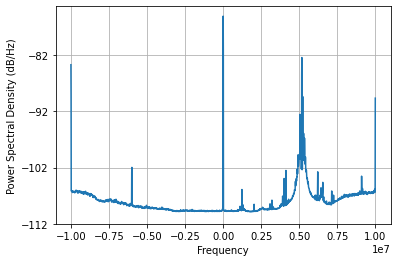

In [6]:
fig = plt.figure()
plt.psd(data, NFFT=2048, Fs=20e6)
plt.show()

### Plotting Spectrogram

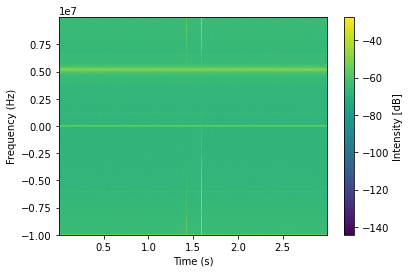

In [7]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Deleting Variable to Save Memory

In [8]:
del data

### Closing the HDF5 File

In [9]:
hf.close()